In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
def feature_normalize(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


def cost(X, y, theta):
    m = X.shape[0]
    pred = predict(X, theta)
    J = 1 / (2*m) * ((pred - y) ** 2).sum()
    return J


def gradient_descent(X, y, theta, alpha, n_iter):
    J_history = []
    theta_history = []
    for _ in range(n_iter):
        pred = predict(X, theta)
        theta = theta - alpha / m * X.T @ (pred - y) 
        theta_history.append(theta)
        J = cost(X, y, theta)
        J_history.append(J)
    theta_history = np.array(theta_history)
    return theta, theta_history, J_history


def predict(X, theta):
    pred = X @ theta
    return pred

In [3]:
# Load data
boston = load_boston()
X = boston.data[:, 12]
y = boston.target

# Scale features
X, mu, sigma = feature_normalize(X)

# Add intercept term to X
m = X.shape[0]
intercept = np.ones((m, 1))
if X.ndim == 1:
    X = np.hstack([intercept, X.reshape(-1, 1)])
else:
    X = np.hstack([intercept, X])

# Initialize theta
n = X.shape[1]
theta = np.zeros(n)

alpha = 0.01
n_iter = 400

# Run gradient descent
theta, theta_history, J_history = gradient_descent(X, y, theta, alpha, n_iter)

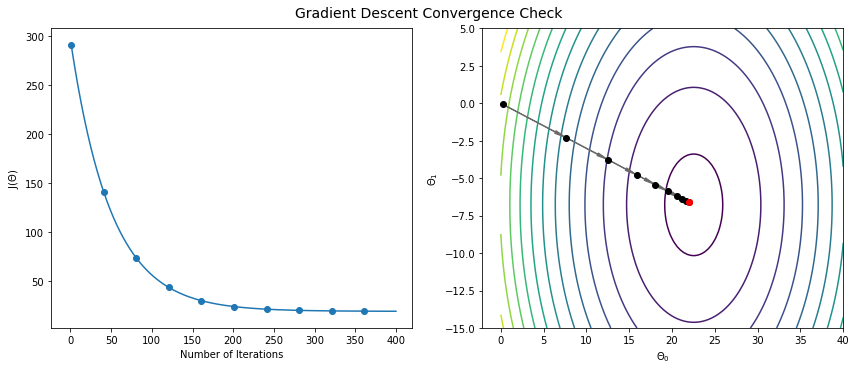

In [4]:
step = 40

plt.subplots(figsize=(12, 5))

# Line plot
plt.subplot(1, 2, 1)
plt.plot(range(1, n_iter+1), J_history)
plt.scatter(range(1, n_iter+1)[::step], J_history[::step])
plt.xlabel('Number of Iterations')
plt.ylabel('J($\Theta$)')

# Contour plot
plt.subplot(1, 2, 2)
theta0_vals = np.linspace(0, 40, 100)
theta1_vals = np.linspace(-15, 5, 100)
X_, Y_ = np.meshgrid(theta0_vals, theta1_vals)
theta0_len = len(theta0_vals)
theta1_len = len(theta1_vals)
J_vals = np.zeros((theta1_len, theta0_len))
for i in range(theta1_len):
    for j in range(theta0_len):
        t = np.array([theta0_vals[j], theta1_vals[i]])
        J_vals[i, j] = cost(X, y, t)
plt.contour(X_, Y_, J_vals, 15, zorder=0)

# Trajectory of theta
theta0_history = theta_history[::step, 0]
theta1_history = theta_history[::step, 1]
for i in range(len(theta0_history)-1):
    xy = (theta0_history[i+1], theta1_history[i+1])
    xytext = (theta0_history[i], theta1_history[i])
    plt.annotate('', xy=xy, xytext=xytext,
                 arrowprops=dict(color='dimgray', width=0.5, headwidth=3), zorder=1)
plt.scatter(theta0_history, theta1_history, color='k', zorder=2)
plt.scatter(theta0_history[-1], theta1_history[-1], color='r', zorder=3)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')

plt.tight_layout()
plt.suptitle('Gradient Descent Convergence Check', y=1.02, fontsize=14)
plt.show()